In [1]:
from src.Sonufy import *
from src.AudioDataGenerator import AudioDataGenerator
import matplotlib.pyplot as plt

In [2]:
adg = AudioDataGenerator(batch_size=32, input_size=(64,1030), output_size=(64,64), directory='data/mels')

Found 223216 files for prediction set


In [24]:
sonufy = Sonufy(latent_dims=64, output_size=(64,64))

In [25]:
# sonufy.build_model(filters=(16,32,64,256))
sonufy.build_model()

In [ ]:
sonufy.train(mel_directory='data/mels', epochs=10, train_test_split=.02, batch_size=128, sample_size=100000)

Found 98000 files for training set
Found 2000 files for testing set
Epoch 1/10
765/765 [==============================] - 143s 186ms/step - loss: 0.0148 - val_loss: 0.0108
Epoch 2/10
765/765 [==============================] - 142s 185ms/step - loss: 0.0099 - val_loss: 0.0096
Epoch 3/10
765/765 [==============================] - 141s 184ms/step - loss: 0.0091 - val_loss: 0.0089
Epoch 4/10
765/765 [==============================] - 143s 186ms/step - loss: 0.0085 - val_loss: 0.0083
Epoch 5/10
765/765 [==============================] - 138s 181ms/step - loss: 0.0081 - val_loss: 0.0079
Epoch 6/10
765/765 [==============================] - 139s 181ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 7/10
765/765 [==============================] - 138s 180ms/step - loss: 0.0078 - val_loss: 0.0076
Epoch 8/10
765/765 [==============================] - 139s 181ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 9/10
765/765 [==============================] - 141s 184ms/step - loss: 0.0075 - val_loss: 0.0

In [ ]:
model_path = 'data/test_64dim_robust'

sonufy.save_encoder(model_path)
sonufy.build_vectors_from_model(mel_directory='data/mels', all_tracks_file='data/all_tracks_shuffled.feather')
sonufy.save(model_path)

In [ ]:
# sonufy.load('data/test_128dim_newmels/')

In [7]:
test_img = adg.take(1)[0]
test_img2 = adg.take(0)[0]

Two separate images taken from different tracks:

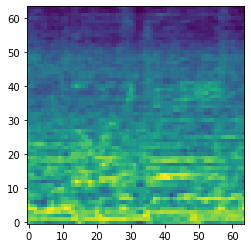

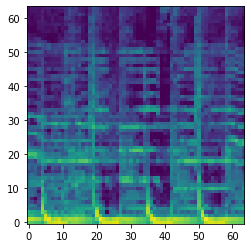

In [8]:
plt.imshow(test_img[0], origin='lower')
plt.show()
plt.imshow(test_img2[0], origin='lower')
plt.show()

Autoencoder predictions for those images.

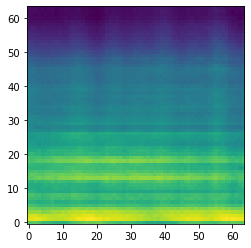

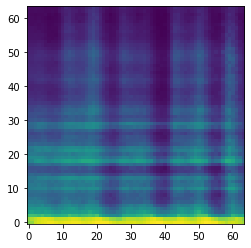

In [9]:
plt.imshow(sonufy.autoencoder(test_img)[0], origin='lower')
plt.show()
plt.imshow(sonufy.autoencoder(test_img2)[0], origin='lower')
plt.show()

Distribution comparison between two images.

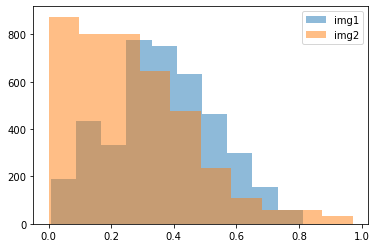

In [10]:
plt.hist(np.array(test_img[0]).reshape(-1), alpha=0.5, label='img1')
plt.hist(np.array(test_img2[0]).reshape(-1), alpha=0.5, label='img2')
plt.legend()
plt.show()

Distribution comparision between one image and the prediction.

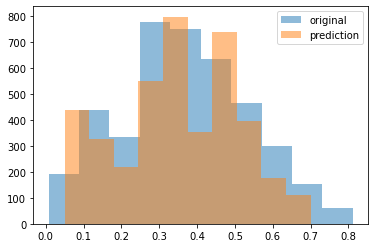

In [11]:
plt.hist(np.array(test_img[0]).reshape(-1), alpha=0.5, label='original')
plt.hist(np.array(sonufy.autoencoder(test_img)[0]).reshape(-1), alpha=0.5, label='prediction')
plt.legend()
plt.show()

comparison between encoded original and encoded prediction

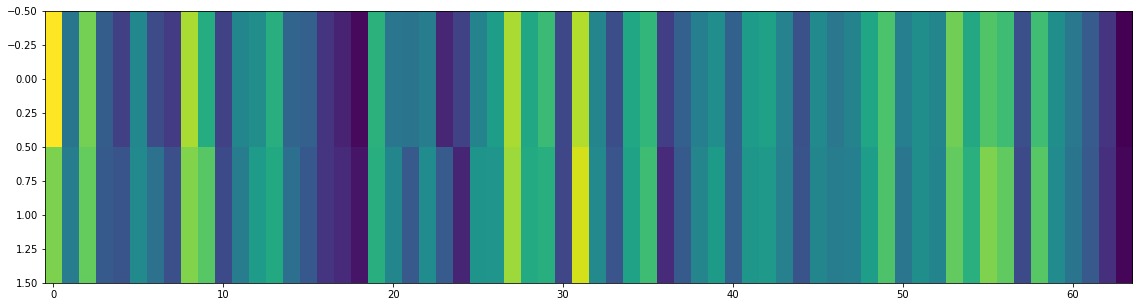

In [12]:
concat_img = np.array([sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))[0], sonufy.autoencoder.encoder(test_img)[0]])
plt.figure(figsize=(20,5))
plt.imshow(concat_img, aspect=8)

compare encoded between two images

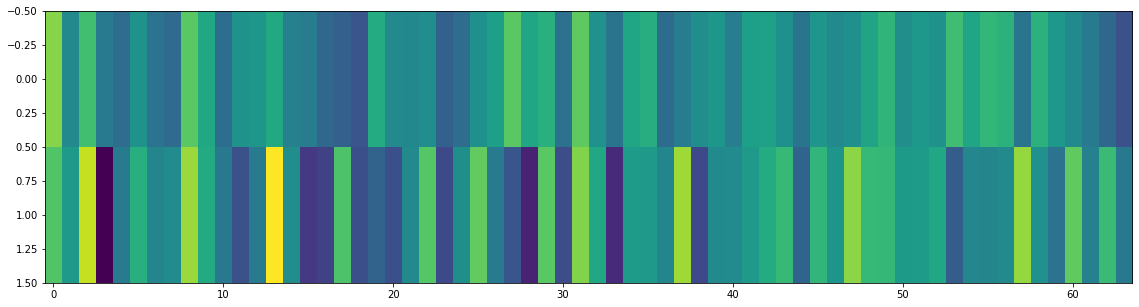

In [13]:
concat_img_compare = np.array([sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))[0], sonufy.autoencoder.encoder(sonufy.autoencoder(test_img2))[0]])
plt.figure(figsize=(20,5))
plt.imshow(concat_img_compare, aspect=8)

compare encoded between the mean of the first image batch and the two images.

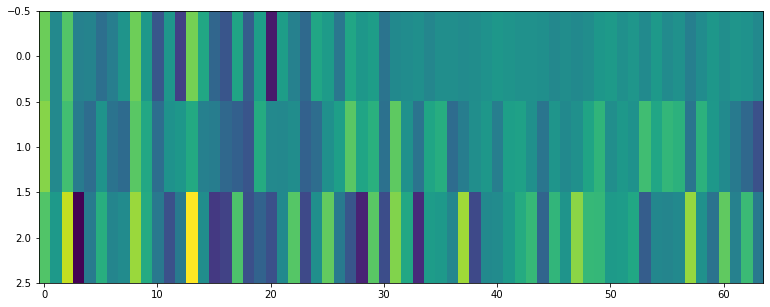

In [15]:
concat_img_compare = np.array([np.array(sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))).mean(axis=0), sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))[0], sonufy.autoencoder.encoder(sonufy.autoencoder(test_img2))[0]])
plt.figure(figsize=(20,5))
plt.imshow(concat_img_compare, aspect=8)

Look at the scale of each feature in the encoded space. Needs to be scaled which is what is happening later on.

In [16]:
pd.Series(np.array(sonufy.autoencoder.encoder(test_img)[0]).reshape(-1))

0     5.728930
1    -0.277097
2     5.120346
3    -2.510439
4    -2.855193
        ...   
59    0.633436
60   -0.877860
61   -2.565618
62   -4.755687
63   -6.693088
Length: 64, dtype: float32

In [17]:
concat_img_compare[0].shape

(64,)

heat map cosine similarity between encoded images for entire batch vs batch

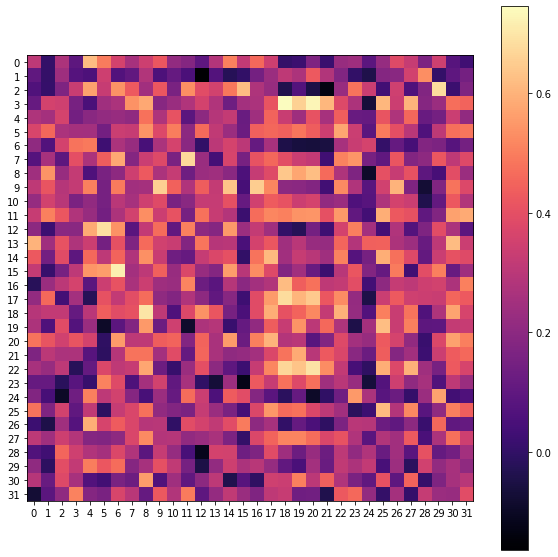

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

plt.figure(figsize=(10,10))
plt.imshow(cosine_similarity(sonufy.autoencoder.encoder(test_img), sonufy.autoencoder.encoder(test_img2)), cmap='magma')
plt.xticks(ticks=range(32))
plt.yticks(ticks=range(32))
plt.colorbar()
plt.show()

cosine similarity between mean and the entire batch of the second image.

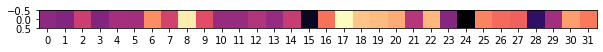

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(cosine_similarity(np.array(sonufy.autoencoder.encoder(test_img)).mean(axis=0).reshape(1,-1), sonufy.autoencoder.encoder(test_img2)), cmap='magma')
plt.xticks(ticks=range(32))
plt.show()

cosine similarity between encoded space of the mean of the two images.

In [20]:
cosine_similarity(np.array(sonufy.autoencoder.encoder(test_img)).mean(axis=0).reshape(1,-1), np.array(sonufy.autoencoder.encoder(test_img2)).mean(axis=0).reshape(1,-1))


array([[0.9515314]], dtype=float32)

In [ ]:
a, b, c, d = sonufy.search_for_recommendations(query='dee d jackson automatic', get_time_and_freq=True)

In [ ]:
a['name']

In [ ]:
b

In [ ]:
similarity_img = np.concatenate([np.array(d), np.array(c[sonufy.latent_cols])])

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(similarity_img, aspect=5)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mean_squared_error(test_img[0].reshape(64,64), np.array(sonufy.autoencoder(test_img)[0]).reshape(64,64))